<a href="https://colab.research.google.com/github/akashshukla7458/spamsms/blob/main/spamcall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import re
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import io

In [6]:
from google.colab import files
uploaded = files.upload()

Saving fraudcall.txt to fraudcall.txt


In [7]:
data = pd.read_csv('fraudcall.txt', sep='\t', names=['label','content'])

In [8]:
data.head()

,label,content
0,spam,"hello, i m bank manager of SBI, ur debit card ..."
1,spam,Todays Vodafone numbers ending with 4882 are s...
2,hamm,Please don't say like that. Hi hi hi
3,hamm,Thank you!
4,hamm,Oh that was a forwarded message. I thought you...


In [9]:
data['label'].value_counts()

hamm    5289
spam     638
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

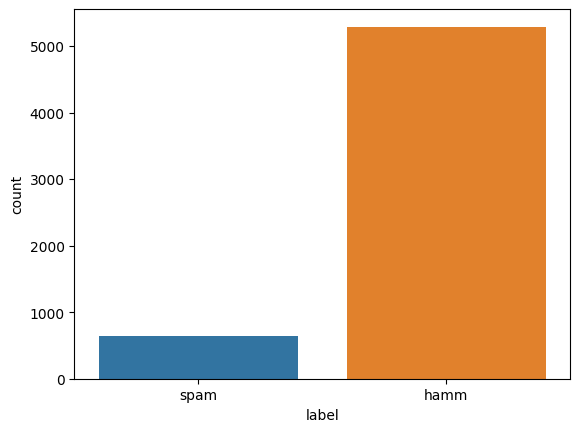

In [10]:
import seaborn as sns
sns.countplot(data=data, x='label')

In [11]:
"""perform text preprocessing"""
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
ps = WordNetLemmatizer()
cv = TfidfVectorizer(max_features=2000)

In [18]:
def remove_digit(data) :
    corpos = []
    for i in range(0, len(data)) :
        review = re.sub('[^a-zA-Z]', ' ', data['content'][i])
        review = review.lower()
        review = review.split()
        review = [ps.lemmatize(word) for word in review if word not in stopwords.words('english')]
        review = ' '.join(review)
        corpos.append(review)
    return corpos

In [15]:
from sklearn.metrics import recall_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score
"""creating/training of model."""
def detect_model(corpos, data):
    x = cv.fit_transform(corpos).toarray()
    y = pd.get_dummies(data['label'])
    y = y.iloc[:, 1].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
    fraud_detect = MultinomialNB().fit(x_train, y_train)
    print("model has trained.")
    y_ped = fraud_detect.predict(x_test)
    cong_m = confusion_matrix(y_test, y_ped)
    acc = accuracy_score(y_test, y_ped)
    recall = recall_score(y_test,y_ped)
    cl_r = classification_report(y_test,y_ped)
    print("Confusion matrix:", cong_m)
    print("Accuracy_score:", acc)
    print("recall_score is:",recall)
    print("Classification report id:",cl_r)
    return fraud_detect

In [24]:
import nltk
nltk.download('wordnet')
def remove_digit(data):
    corpos = []
    for i in range(0, len(data)):
        review = re.sub('[^a-zA-Z]', ' ', data['content'][i])
        review = review.lower()
        review = review.split()
        review = [ps.lemmatize(word) for word in review if word not in stopwords.words('english')]
        review = ' '.join(review)
        corpos.append(review)
    return corpos

proper_list = remove_digit(data)
model = detect_model(proper_list, data)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


model has trained.
Confusion matrix: [[1055    1]
 [  25  105]]
Accuracy_score: 0.9780775716694773
recall_score is: 0.8076923076923077
Classification report id:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1056
           1       0.99      0.81      0.89       130

    accuracy                           0.98      1186
   macro avg       0.98      0.90      0.94      1186
weighted avg       0.98      0.98      0.98      1186

